# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [1]:
# Your code goes here
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

Number of instances: 2845, number of attributes: 1000


abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002149     0.006709     0.001454     0.002286   
std       0.030224     0.020739     0.034631     0.023100     0.021634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003953     0.003115     0.000921     0.008366     0.001816   
std       0.030111     0.026958     0.016275     0.043921     0.026026   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.663808     0.572124     0.413233     1.000000     0.578282   

           adapter          add      address      advance    advantage  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.001948     0.004346     0.005444     0.006751     0.002074   
std       0.021924     0.032763     0.043735     0.038801     0.022357   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.515908     0.569114     0.829519     0.624724     0.460632   

            advice          ago        agree        ahead          ahl  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002630     0.005717     0.005265     0.001816     0.001252   
std       0.025134     0.034103     0.034597     0.022532     0.021062   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.399285     0.474195     0.517133     0.515734     0.645302   

                al        allow      allowed       allows       alomar  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.004034     0.002633     0.001908     0.001571     0.003423   
std       0.032852     0.022898     0.019553     0.018070     0.042492   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.547738     0.454043     0.483493     0.335889     0.786199   

               alt     american        amour       andrew      angeles  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002295     0.002890     0.000684     0.002202     0.001367   
std       0.028210     0.024145     0.013320     0.025851     0.014816   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     0.380662     0.570912     0.529946     0.305968   

            a

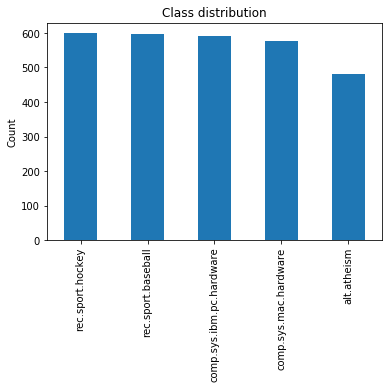

In [18]:
# Your code goes here
print('Number of instances: {}, number of attributes: {}'.format(X.shape[0], X.shape[1]))
pd.Series(y).value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class distribution')
X.describe()

*Your answer goes here*
<font color='blue'>
X is a dataframe storing the 1000 featurs of the 2845 samples as weights, which each represent the importance of a word to a document with respect to a collection of documents. The higher the values, the more important the feature is.
The numpy ndarray y is the corresponding newsgroup each document belong to. The five categories are alt.atheism, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, rec.sport.baseball, rec.sport.hockey.  

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [3]:
# Your code goes here
kmeans = KMeans(n_clusters=5, random_state=1337)  
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1337, tol=0.0001, verbose=0)

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [4]:
# Your code goes here
np.linalg.norm(X - X.mean(),axis=1).sum()/X.shape[0], kmeans.inertia_,  adjusted_rand_score(y, kmeans.labels_)

(0.95458494985164111, 2593.371894110217, 0.25060865875687255)

*Your answer goes here*
<font color='blue'>
Inertia, the within-cluster sum of squared difference between datapoints and their closest cluster centre, can be recognized as a measure of how internally coherent clusters are. Lower inertia implies a better fit. It is difficult to judge whether the inertia value here is good or bad, as the we do not know the upper limit.

The adjusted Rand index is a function that measures the similarity of the two assignments(true label and prediction), ignoring permutations and with chance normalization. Perfect labeling is scored 1.0, while bad (e.g. independent labelings) have negative or close to 0.0 scores. The ari here is bad, meaning not correctly labeling. 


### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [14]:
# Your code goes here
print('1. the number of datapoints with each label\n{}, \n\n2. the number of datapoints assigned to each cluster\n{}.'
      .format(pd.Series(y).value_counts(),pd.Series(kmeans.labels_).value_counts()))



1. the number of datapoints with each label
rec.sport.hockey            600
rec.sport.baseball          597
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
alt.atheism                 480
dtype: int64, 

2. the number of datapoints assigned to each cluster
0    969
1    689
4    584
3    381
2    222
dtype: int64.


*Your answer goes here*
<font, color='blue'>
Compared to the number of datapoints with each label, the numbers of datapoints asigned to each cluster centres is not as evenly distributed as the true label.  
Specificlly, the cluster 0 contains 969 datapoints which is almost 34% of the whole data. While there are only 222 datapoints assigned to the cluster 2. The cluster 4 contains 584 datapoints, which is more reasonablly similar to the true distribution of datapoint of true label.


### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [10]:
# Your code goes here
sklearn.metrics.pairwise.euclidean_distances(kmeans.cluster_centers_)

array([[ 0.        ,  0.18862704,  0.34253171,  0.21613938,  0.20554353],
       [ 0.18862704,  0.        ,  0.32152977,  0.27272268,  0.29016893],
       [ 0.34253171,  0.32152977,  0.        ,  0.39789789,  0.40913504],
       [ 0.21613938,  0.27272268,  0.39789789,  0.        ,  0.28301014],
       [ 0.20554353,  0.29016893,  0.40913504,  0.28301014,  0.        ]])

### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

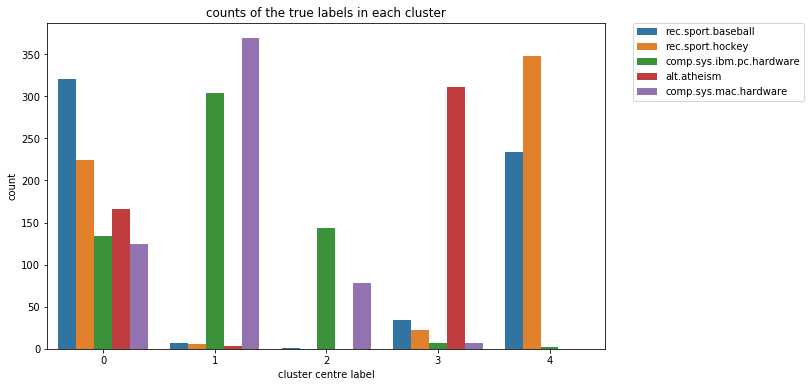

In [13]:
# Your code goes here
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x=kmeans.labels_, hue=y, ax=ax)
plt.xlabel('cluster centre label')
plt.title('counts of the true labels in each cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

*Your answers goes here* 
<font color='blue'>
The cluster 0 contains a big chunk of each labels datapoints assigned to it.  
There is 1 cluster that contains one main type of datapoint: cluster 3 (label 'atheism'). This cluster centre is relatively 'far way' from the others. The other clusters contain a mix.  
The 'ibm.pc' and 'mac' are divided by cluster 0,1,2, as we already realised that the 'ibm.pc' and 'mac' datapoints are similar, so their distribution to each cluster are similar. So as the 'baseball' and 'hockey' datapoints have similar distribution to cluster 0,1,3,4.

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

For n_components=1, the kmeans inertia = 2.82090668045, adjusted_rand_score = 0.21022329339
For n_components=2, the kmeans inertia = 10.5803187522, adjusted_rand_score = 0.268239178812
For n_components=3, the kmeans inertia = 20.4564002027, adjusted_rand_score = 0.240940526865
For n_components=5, the kmeans inertia = 49.8317759503, adjusted_rand_score = 0.22681581826
For n_components=10, the kmeans inertia = 117.951936909, adjusted_rand_score = 0.216079932781
For n_components=20, the kmeans inertia = 230.591132932, adjusted_rand_score = 0.213061133916
For n_components=50, the kmeans inertia = 488.838832085, adjusted_rand_score = 0.215513479304
For n_components=100, the kmeans inertia = 801.049677303, adjusted_rand_score = 0.21618975842
For n_components=500, the kmeans inertia = 2132.04129374, adjusted_rand_score = 0.222262138537
For n_components=1000, the kmeans inertia = 2593.19201049, adjusted_rand_score = 0.22782562061


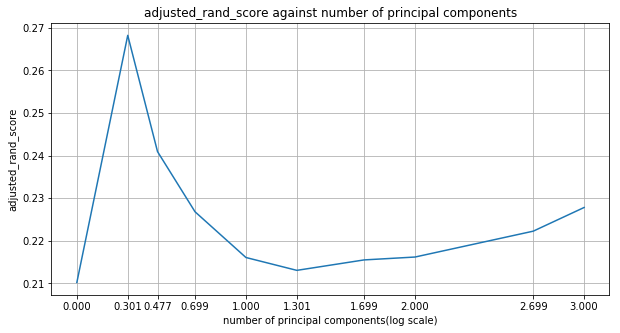

In [21]:
# Your code goes here
seed = 0 
rng = np.random.RandomState(seed)
rng.seed(seed)
components = [1,2,3,5,10,20,50,100,500,1000]
ars = []
for n_components in components:
    pca = PCA(n_components=n_components,random_state=rng)
    X_new = pca.fit_transform(X)
    _ = KMeans(n_clusters=5, random_state=rng)
    _.fit(X_new)
    ars.append(adjusted_rand_score(y, _.labels_))
    print('For n_components={}, the kmeans inertia = {}, adjusted_rand_score = {}'
          .format(n_components, _.inertia_, adjusted_rand_score(y, _.labels_)))

'''Plot adjusted_rand_score against number of principal components (label graph). 
Use a log scale on the x axis.'''
from matplotlib.ticker import FormatStrFormatter
x = np.log10(components)
ax = plt.figure(figsize=(10,5)).add_subplot(111)
plt.plot(x,ars)
ax.set_xticks(x)
ax.set_xticklabels(x) 
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.grid()
plt.ylabel('adjusted_rand_score')
plt.xlabel('number of principal components(log scale)')
plt.title('adjusted_rand_score against number of principal components')

*Your answer goes here*
<font color='blue'>
1. Describe what it shows  
The adjusted_rand_score drops down as the n_components decrease from 1000 to 20, then it turns to increase and reach its peak at n_components = 2. The smallest adjusted_rand_score may varies with respect to different random state, but the peak always accurs at n_components = 2. Recalled that the closer to 1 the adjusted_rand_score, the better. So here it seems that set n_components = 2 is a good choice  

2. Explain why we cannot use inertia to choose the best number of principal components  
Because inertia values deeply relates with the number of components being kept via PCA.   
As inertia is the within-cluster sum of the squared difference between datapoints and their closest cluster centre. When PCA tries to compress the size of the data set by keeping only the important information (set by n_components). The more data was compressed, the less variance left in the data. Thus the smaller the inertia will be.  
Specificlly, when n_components=1000, which means no compression. Then the inertia is the same as before. The inertia keeps dropping down as the more and more information is compressed via PCA alongsides with the smaller the smaller n_components. Until the smallest n_components=1, where only one dimension was left, the inertia becomes the smallest.

3. Explain why dimensionality reduction could help k-means perform better  
Doing PCA is seful for dimensionality reduction as a feature extractor and visualize or reveal possible clusters.
In addition, doing PCA after clustering can validate the clustering algorithm. Finally, a successful implementaion of PCA helps eliminate noise, reduces space used by data, and more importantly, speeds up k-means algorithms.


### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

In [ ]:
# Your code goes here
rng.seed(seed)
n_components=2
pca = PCA(n_components=n_components,random_state=rng)
X_2d = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=5, random_state=rng)
kmeans_pca.fit(X_2d)
print('For n_components={}, the kmeans adjusted_rand_score = {}'
          .format(n_components,adjusted_rand_score(y, _.labels_)))

*Your answer goes here*

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [ ]:
# Your code goes here

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

In [ ]:
# Your code goes here

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

In [ ]:
# Your code goes here

### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

*Your answer goes here*

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

In [ ]:
# Your code goes here

*Your answer goes here*

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

In [ ]:
# Your code goes here

*Your answer goes here*

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

In [ ]:
# Your code goes here

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

In [ ]:
# Your code goes here

*Your answer goes here*

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [ ]:
# Your code goes here

*Your answer goes here*